In [21]:
import numpy as np
import CaGD_log
import matplotlib.pyplot as plt

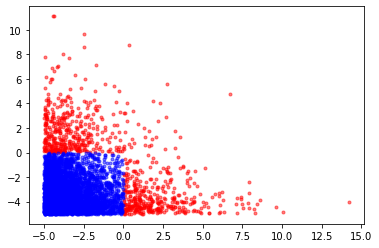

In [47]:
N = 5000
n = 2

# COMMENT/UNCOMMENT THE RESPECTIVE PART TO OBTAIN THE WANTED EXPERIMENT

###### EXPERIMENT A
# X = np.random.uniform(-1, 1., (N,n))
# Y = np.zeros(N)
# Y[X[:,1]>np.sin(np.pi*X[:,0])] = 1.
########################

###### EXPERIMENT B
X = np.random.exponential(2., (N,n))-5
tmp = X<0
tmp = np.all(tmp,1)
Y = np.zeros(N)
Y[tmp] = 1
########################

###### EXPERIMENT C
# X = np.random.uniform(-1, 1., (N,n))
# theta_star = [-5,2]
# tmp = np.random.uniform(size=N)
# Y = np.dot(X,theta_star)
# Y = np.divide(1,1-np.exp(-Y)).T
# Y[tmp>Y] = -1.
# Y[tmp<=Y] = 0.
# Y= np.abs(Y)
########################

plt.plot(X[Y==0,0],X[Y==0,1],'r.',alpha=0.5)
plt.plot(X[Y==1,0],X[Y==1,1],'b.',alpha=0.5)
# plt.savefig('logistic_5000.pdf', bbox_inches='tight')
plt.show()

theta_0 = np.random.uniform(-1/n**0.5,1/n**0.5,size=n)

In [51]:
step = 1e-3
error = 5e-3
max_it = 1e4

err,iteration,theta,t = CaGD_log.gd_log(X,Y,theta_0,step,error,max_it)
print(err,iteration,theta[-1,:], t)

iteration  100  | norm of the gradient =  1.9682008281905599
iteration  200  | norm of the gradient =  1.257500453681902
iteration  300  | norm of the gradient =  0.8826772588274782
iteration  400  | norm of the gradient =  0.6703182832004865
iteration  500  | norm of the gradient =  0.5371802554108918
iteration  600  | norm of the gradient =  0.4465483868986311
iteration  700  | norm of the gradient =  0.38082887653712
iteration  800  | norm of the gradient =  0.3308029877920824
iteration  900  | norm of the gradient =  0.29126772200018736
iteration  1000  | norm of the gradient =  0.259101014291202
iteration  1100  | norm of the gradient =  0.23232783242300328
iteration  1200  | norm of the gradient =  0.2096393986695834
iteration  1300  | norm of the gradient =  0.19013302465159365
iteration  1400  | norm of the gradient =  0.17316465736350012
iteration  1500  | norm of the gradient =  0.1582613275468022
iteration  1600  | norm of the gradient =  0.14506688039750887
iteration  1700 

In [52]:
# it will stop as soon as he gets the same error of the standard GD

err_CA, iteration_CA, theta_CA, t_CA = CaGD_log.gd_log_CA(X,Y,theta_0,step,err,max_it)

iteration  1  | norm of the gradient after a full iteration =  4.277977676191871
iterations done with the reduced measure =  218
iteration  2.1308  | norm of the gradient after the acceleration procedure =  3.208556836354477
iteration  3.1308  | norm of the gradient after a full iteration =  1.5306717480937597
iterations done with the reduced measure =  191
iteration  4.2454  | norm of the gradient after the acceleration procedure =  1.23689222581678
iteration  5.2454  | norm of the gradient after a full iteration =  0.850670596864115
iterations done with the reduced measure =  425
iteration  6.5004  | norm of the gradient after the acceleration procedure =  0.662368872125413
iteration  7.5004  | norm of the gradient after a full iteration =  0.39395385976283254
iterations done with the reduced measure =  310
iteration  8.686399999999999  | norm of the gradient after the acceleration procedure =  0.3445161548551176
iteration  9.686399999999999  | norm of the gradient after a full itera

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official GD/recombination.py:373: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)


iterations done with the reduced measure =  2
iteration  54.24279999999996  | norm of the gradient after the acceleration procedure =  0.03109080256285086
iteration  55.24279999999996  | norm of the gradient after a full iteration =  0.03107107877581759
iterations done with the reduced measure =  2
iteration  56.24399999999996  | norm of the gradient after the acceleration procedure =  0.031051367866370798
iteration  57.24399999999996  | norm of the gradient after a full iteration =  0.031031669825595697
iterations done with the reduced measure =  2
iteration  58.245199999999954  | norm of the gradient after the acceleration procedure =  0.031011984644584312
iteration  59.245199999999954  | norm of the gradient after a full iteration =  0.030992312314435472
iterations done with the reduced measure =  2
iteration  60.24639999999995  | norm of the gradient after the acceleration procedure =  0.030972652826255078
iteration  61.24639999999995  | norm of the gradient after a full iteration 

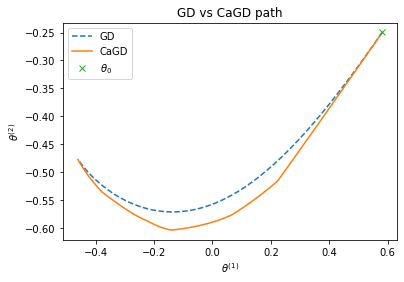

In [53]:
import matplotlib.pyplot as plt

idx_1=0
idx_2=1

plt.plot(theta[:,idx_1],theta[:,idx_2],'--', label = "GD") 
plt.plot(theta_CA[:,idx_1],theta_CA[:,idx_2],'-', label = "CaGD") 
plt.plot(theta[0,idx_1],theta[0,idx_2],'x', label = r'$\theta_0$')
plt.legend() 
plt.title('GD vs CaGD path')
plt.xlabel(r'$\theta^{(1)}$')
plt.ylabel(r'$\theta^{(2)}$')
# plt.savefig('gd_vs_gdCA_path_case_greater0.pdf', bbox_inches='tight')
plt.show()